In [1]:
import matplotlib.pyplot as plt                                                                                                                                             # type: ignore
import seaborn as sns                                                                                                                                                       # type: ignore
from sklearn.linear_model import LogisticRegression                                                                                                                         # type: ignore
from sklearn.model_selection import train_test_split                                                                                                                        # type: ignore
from sklearn.metrics import confusion_matrix ,accuracy_score ,f1_score ,recall_score ,precision_score ,precision_recall_fscore_support ,precision_recall_curve              # type: ignore
from sklearn.metrics import classification_report ,roc_curve ,auc ,roc_auc_score ,zero_one_loss                                                                             # type: ignore
#----------------------------------------------------
'''
#linear_model.LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
                                class_weight=None,random_state=None,solver='warn',max_iter=100,
                                multi_class='warn', verbose=0,warm_start=False, n_jobs=None)
'''

# LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
# LogisticRegressionModel.fit(X_train, y_train)

## Calculating Details:
# print(f'LogisticRegressionModel Train Score       : {LogisticRegressionModel.score(X_train, y_train)}')
# print(f'LogisticRegressionModel Test Score        : {LogisticRegressionModel.score(X_test, y_test)}')
# print(f'LogisticRegressionModel Classes           : {LogisticRegressionModel.classes_}')
# print(f'LogisticRegressionModel No. of iterations : {LogisticRegressionModel.n_iter_}')
# print('----------------------------------------------------')

## Calculating Prediction:
# y_pred = LogisticRegressionModel.predict(X_test)
# y_pred_prob = LogisticRegressionModel.predict_proba(X_test)      
# print(f'Predicted Value for LogisticRegressionModel : {y_pred[:10]}\n')
# print(f'Prediction Probabilities Value for LogisticRegressionModel : \n{y_pred_prob[:10]}')

"\n#linear_model.LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,\n                                class_weight=None,random_state=None,solver='warn',max_iter=100,\n                                multi_class='warn', verbose=0,warm_start=False, n_jobs=None)\n"

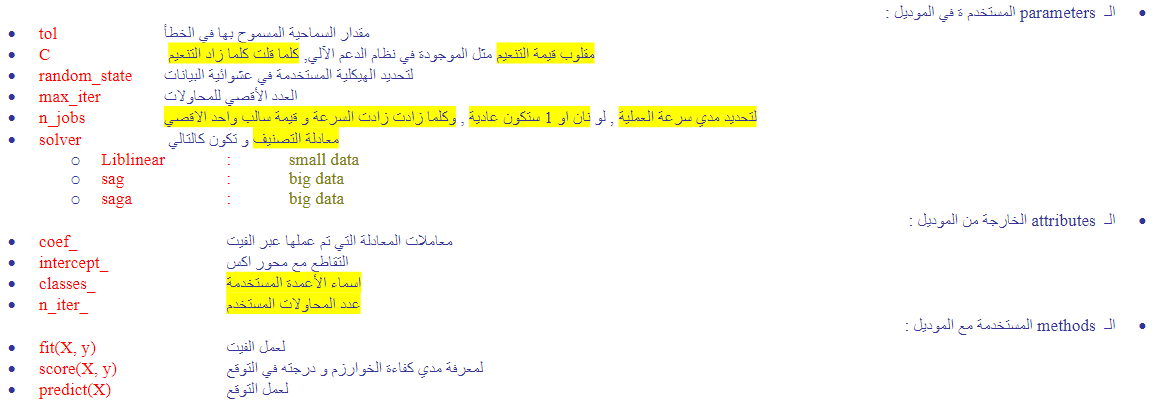

In [2]:
from sklearn.datasets import load_breast_cancer     # type: ignore

X , y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

> ## **Applying LogisticRegression Model:**

In [3]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='liblinear',C=1.0,max_iter=10000,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

## Calculating Details:
print(f'LogisticRegressionModel Train Score       : {LogisticRegressionModel.score(X_train, y_train)}')
print(f'LogisticRegressionModel Test Score        : {LogisticRegressionModel.score(X_test, y_test)}')
print(f'LogisticRegressionModel Classes           : {LogisticRegressionModel.classes_}')
print(f'LogisticRegressionModel No. of iterations : {LogisticRegressionModel.n_iter_}')

LogisticRegressionModel Train Score       : 0.958005249343832
LogisticRegressionModel Test Score        : 0.9627659574468085
LogisticRegressionModel Classes           : [0 1]
LogisticRegressionModel No. of iterations : [18]


> ## **Calculating Prediction:**

In [4]:
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)      
print(f'Predicted Value for LogisticRegressionModel : {y_pred[:10]}\n')
print(f'True  Value for LogisticRegressionModel     : {y_train[:10]}\n')
print(f'Prediction Probabilities Value for LogisticRegressionModel : \n{y_pred_prob[:10]}')

# [[9.78112495e-01 2.18875055e-02]
# 9.78112495e-01  > probability of the first class
# 2.18875055e-02  > probability of the second class

Predicted Value for LogisticRegressionModel : [0 0 1 0 1 1 1 1 0 1]

True  Value for LogisticRegressionModel     : [0 1 0 0 1 1 1 0 0 0]

Prediction Probabilities Value for LogisticRegressionModel : 
[[9.78112495e-01 2.18875055e-02]
 [9.99999988e-01 1.24674470e-08]
 [3.80931681e-02 9.61906832e-01]
 [1.00000000e+00 2.62257282e-10]
 [2.91078423e-01 7.08921577e-01]
 [1.15470482e-01 8.84529518e-01]
 [6.54586024e-04 9.99345414e-01]
 [6.81949577e-02 9.31805042e-01]
 [9.95544345e-01 4.45565462e-03]
 [2.72990702e-03 9.97270093e-01]]


> ## **Calculating Confusion Matrix:**

Confusion Matrix is : 
[[ 64   4]
 [  3 117]]


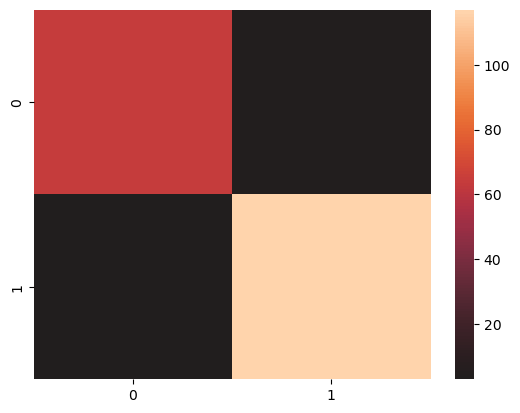

In [5]:
CM = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix is : \n{CM}')

sns.heatmap(CM, center = True)
plt.show()

> ## **Calculating Accuracy Score**  : 
> 👉 ((TP + TN) / float(TP + TN + FP + FN))

In [6]:
AccScore  = accuracy_score(y_test, y_pred, normalize=False)   # normalize = true >> make it in percentage
Accpersnt = accuracy_score(y_test, y_pred, normalize=True)   
print(f'Accuracy Score = {AccScore} >> the percentage = {Accpersnt*100:.1f}%')

Accuracy Score = 181.0 >> the percentage = 96.3%


> ## **Calculating F1 Score**  :
> 👉 2 * (precision * recall) / (precision + recall)                   
> 👉 f1_score( y_true , y_pred, labels=None , pos_label=1 , average=’binary’ , sample_weight=None )          
>  **average** : binary , macro , weighted 

In [7]:
F1Score = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score = {F1Score}')

F1 Score = 0.9595512524973107


> ## **Calculating Recall Score ```Sensitivity```** :
> 👉 (TP / float(TP + FN))   1 / 1+2          
> 👉 recall_score( y_true , y_pred , labels=None , pos_label=1 , average=’binary’ , sample_weight=None )         
>  **average** : binary , macro , weighted

In [8]:
RecallScore = recall_score(y_test, y_pred, average='macro')
print(f'Recall Score = {RecallScore}')

Recall Score = 0.9580882352941176


> ## **Calculating Precision Score ```Specificity```** : 
> 👉 (TP / float(TP + FP))          
> 👉 precision_score( y_true , y_pred , labels=None , pos_label=1 , average=’binary’ , sample_weight=None )

In [9]:
PrecisionScore = precision_score(y_test, y_pred, average='macro')
print(f'Precision Score = {PrecisionScore}')

Precision Score = 0.9610830146786727


> ## **Calculating Precision recall Score** :  
> 👉  precision_recall_fscore_support( y_true , y_pred , beta=1.0 , labels=None , pos_label=1 , average=None , warn_for = ('precision’,’recall’, ’f-score’) , sample_weight=None )        
>  **average** : binary , macro , weighted 

In [10]:
PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f'Precision Recall Score = {PrecisionRecallScore}')

Precision Recall Score = (0.9610830146786727, 0.9580882352941176, 0.9595512524973107, None)


> ## **Calculating Precision recall Curve** :  
> 👉  precision_recall_curve( y_true , probas_pred , pos_label=None , sample_weight=None )

In [11]:
PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print(f'Precision Value  = {PrecisionValue}')
print(f'Recall Value     = {RecallValue}')
print(f'Thresholds Value = {ThresholdsValue}')

Precision Value  = [0.63829787 0.96694215 1.        ]
Recall Value     = [1.    0.975 0.   ]
Thresholds Value = [0 1]


> ## **Calculating classification Report** :  
> 👉  classification_report( y_true , y_pred , labels=None , target_names=None ,sample_weight=None , digits=2 , output_dict=False )

In [12]:
ClassificationReport = classification_report(y_test,y_pred)
print(f'Classification Report :\n {ClassificationReport}')

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.97      0.97      0.97       120

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



> ## **Calculating Area Under the Curve** :  

In [13]:
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print(f'AUC Value = {AUCValue:.3f}')

AUC Value = 0.958


> ## **Calculating Receiver Operating Characteristic** :  
> 👉 roc_curve( y_true , y_score , pos_label=None , sample_weight=None , drop_intermediate=True )

In [14]:
fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print(f'fpr Value        = {fprValue}')
print(f'tpr Value        = {tprValue}')
print(f'thresholds Value = {thresholdsValue}')

fpr Value        = [0.         0.05882353 1.        ]
tpr Value        = [0.    0.975 1.   ]
thresholds Value = [inf  1.  0.]


> ## **Calculating ROC AUC Score**:  
> 👉 roc_auc_score( y_true , y_score , average=’macro’ , sample_weight=None , max_fpr=None )        
>  **average** : macro , weighted , samples

In [22]:
ROCAUCScore = roc_auc_score(y_test,y_pred, average='macro') 
print(f'ROCAUC Score = {ROCAUCScore:.3f}')

ROCAUC Score = 0.958


> ## **Calculating Zero One Loss (`wrong predictions`)**:  
> 👉 zero_one_loss( y_true , y_pred , normalize = True , sample_weight = None )

In [ ]:
ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False)  
print(f'Zero One Loss Value = {ZeroOneLossValue}')

Zero One Loss Value = 7.0
